In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import preprocessing

from IPython.display import display
import pickle
from tqdm.notebook import tqdm
tqdm.pandas()


In [2]:
df = pd.read_csv('./dataset.csv')
df

,type,posts
0,INFJ,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...
1,ENTP,I'm finding the lack of me in these posts very...
2,INTP,Good one _____ https://www.youtube.com/watc...
3,INTJ,"Dear INTP, I enjoyed our conversation the ot..."
4,ENTJ,You're fired.|||That's another silly misconcep...
...,...,...
8670,ISFP,https://www.youtube.com/watch?v=t8edHB_h908|||...
8671,ENFP,So...if this thread already exists someplace e...
8672,INTP,So many questions when i do these things. I w...
8673,INFP,I am very conflicted right now when it comes t...


In [3]:
df['type'] = df['type'].apply(lambda x: x.lower().strip())

In [4]:
df['type'].value_counts()

type
infp    1832
infj    1470
intp    1304
intj    1091
entp     685
enfp     675
istp     337
isfp     271
entj     231
istj     205
enfj     190
isfj     166
estp      89
esfp      48
esfj      42
estj      39
Name: count, dtype: int64

In [5]:
df = df.sort_values(['type'])
df

,type,posts
5777,enfj,My friends say I flirt a lot. That I'm probabl...
7976,enfj,hmm... I think I should post my view of romanc...
2851,enfj,Not surprised since I get along with INTP guys...
342,enfj,hahahahahaha. i just love my ability to read p...
1441,enfj,You are such a good friend. She is lucky to h...
...,...,...
3524,istp,You know your an ISTP female when you tell the...
123,istp,I don't offer advice unless it is asked for or...
3525,istp,.|||Thank you. It's the first time I've tried ...
8419,istp,"I agree with Seralya, message him that, and th..."


In [6]:
df['typeNo'] = df['type'].factorize()[0]
df

,type,posts,typeNo
5777,enfj,My friends say I flirt a lot. That I'm probabl...,0
7976,enfj,hmm... I think I should post my view of romanc...,0
2851,enfj,Not surprised since I get along with INTP guys...,0
342,enfj,hahahahahaha. i just love my ability to read p...,0
1441,enfj,You are such a good friend. She is lucky to h...,0
...,...,...,...
3524,istp,You know your an ISTP female when you tell the...,15
123,istp,I don't offer advice unless it is asked for or...,15
3525,istp,.|||Thank you. It's the first time I've tried ...,15
8419,istp,"I agree with Seralya, message him that, and th...",15


In [7]:
x = df['posts']
y = df['type'].factorize()[0]

In [8]:
x

5777    My friends say I flirt a lot. That I'm probabl...
7976    hmm... I think I should post my view of romanc...
2851    Not surprised since I get along with INTP guys...
342     hahahahahaha. i just love my ability to read p...
1441    You are such a good friend.  She is lucky to h...
                              ...                        
3524    You know your an ISTP female when you tell the...
123     I don't offer advice unless it is asked for or...
3525    .|||Thank you. It's the first time I've tried ...
8419    I agree with Seralya, message him that, and th...
6627    INFP 9w1|||I'm pretty sure he is.|||Si|||Te|||...
Name: posts, Length: 8675, dtype: object

In [9]:
y

array([ 0,  0,  0, ..., 15, 15, 15])

In [10]:
from bs4 import BeautifulSoup
import nltk
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import re
import pickle

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/dpaul/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dpaul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dpaul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
additional_stop_words =[]

def text_cleanup(text):

  text = str(text)
  text_clean = BeautifulSoup(text, "lxml").text
  text_clean = text_clean.lower()
  text_clean = re.sub(r'[^a-zA-Z]|(\w+:\/\/\S+)',' ', text_clean)

  text_clean = text_clean.split()
  text_clean = [w for w in text_clean if len(w)>2]

  lemmatizer = WordNetLemmatizer()
  text_clean = [lemmatizer.lemmatize(w) for w in text_clean]

  stops = set(stopwords. words('english')).union(additional_stop_words)
  text_clean = [w for w in text_clean if w not in stops]

  mySeparator = " "
  text_clean = mySeparator.join(text_clean)

  return text_clean

In [12]:
print(x)

5777    My friends say I flirt a lot. That I'm probabl...
7976    hmm... I think I should post my view of romanc...
2851    Not surprised since I get along with INTP guys...
342     hahahahahaha. i just love my ability to read p...
1441    You are such a good friend.  She is lucky to h...
                              ...                        
3524    You know your an ISTP female when you tell the...
123     I don't offer advice unless it is asked for or...
3525    .|||Thank you. It's the first time I've tried ...
8419    I agree with Seralya, message him that, and th...
6627    INFP 9w1|||I'm pretty sure he is.|||Si|||Te|||...
Name: posts, Length: 8675, dtype: object


In [13]:
RANDOM_STATE = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state = RANDOM_STATE)

In [14]:
x_test_raw = x_test

x_train = [text_cleanup(txt) for txt in tqdm(x_train)]
x_test = [text_cleanup(txt) for txt in tqdm(x_test)]

  0%|          | 0/6940 [00:00<?, ?it/s]

/tmp/ipykernel_6913/168849312.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text_clean = BeautifulSoup(text, "lxml").text


  0%|          | 0/1735 [00:00<?, ?it/s]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
x_train = count_vect.fit_transform(x_train)
x_test = count_vect.transform(x_test)

x_train

<6940x78683 sparse matrix of type '<class 'numpy.int64'>'
	with 2735550 stored elements in Compressed Sparse Row format>

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt = "d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation = 30, ha = 'right')
  plt.ylabel('Truth')
  plt.xlabel('Predicted')


Testing

In [17]:
types = [type_ for type_ in df['type'].factorize()[1]]
types

['enfj',
 'enfp',
 'entj',
 'entp',
 'esfj',
 'esfp',
 'estj',
 'estp',
 'infj',
 'infp',
 'intj',
 'intp',
 'isfj',
 'isfp',
 'istj',
 'istp']

In [18]:
d = {k: v for k, v in enumerate(types)}
d

{0: 'enfj',
 1: 'enfp',
 2: 'entj',
 3: 'entp',
 4: 'esfj',
 5: 'esfp',
 6: 'estj',
 7: 'estp',
 8: 'infj',
 9: 'infp',
 10: 'intj',
 11: 'intp',
 12: 'isfj',
 13: 'isfp',
 14: 'istj',
 15: 'istp'}

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver= 'lbfgs', max_iter=400, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred, target_names = types))

              precision    recall  f1-score   support

        enfj       0.43      0.26      0.33        38
        enfp       0.56      0.47      0.51       135
        entj       0.47      0.39      0.43        46
        entp       0.53      0.55      0.54       137
        esfj       0.38      0.33      0.35         9
        esfp       1.00      0.10      0.18        10
        estj       0.00      0.00      0.00         8
        estp       0.33      0.11      0.17        18
        infj       0.61      0.65      0.63       294
        infp       0.62      0.72      0.67       366
        intj       0.59      0.63      0.61       218
        intp       0.64      0.69      0.66       261
        isfj       0.70      0.42      0.53        33
        isfp       0.46      0.39      0.42        54
        istj       0.57      0.39      0.46        41
        istp       0.66      0.52      0.58        67

    accuracy                           0.59      1735
   macro avg       0.53   

/home/dpaul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dpaul/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dpaul/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being 

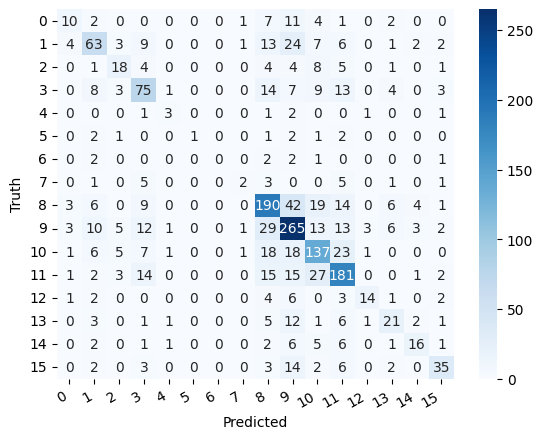

In [20]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [21]:
LR_model = model

In [22]:
def type_text(text,model,vect):
  text = vect.transform([text])
  return model.predict(text).flatten()[0]

def type_prob(text,model,vect):
  text = vect.transform([text])
  return model.predict_proba(text).flatten()

In [28]:
text = 'The weather is unpredictable this time of year'
category_int = type_text(text,LR_model, count_vect)
category = d[category_int]
confidence = type_prob(text, LR_model, count_vect)[category_int]

category, confidence

('infp', 0.3199168370947723)

In [34]:
from joblib import dump
from joblib import load

dump(model, 'models/log_model.joblib')
dump(count_vect, 'models/count_vec.joblib')


# Load the model from the file
model = load('models/log_model.joblib')
count_vect = load('models/count_vec.joblib')
